In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#reading the dataset
df = pd.read_csv("output.csv")

#removel of insignificant features
df.drop('smoker',axis=1,inplace=True)
df.drop('monthlyincome',axis=1,inplace=True)

#label encoding for categorical variables
labelencoder = LabelEncoder()
df['job'] = labelencoder.fit_transform(df['job'].astype(str))
df['marital'] = labelencoder.fit_transform(df['marital'].astype(str))
df['education'] = labelencoder.fit_transform(df['education'].astype(str))
df['loan'] = labelencoder.fit_transform(df['loan'].astype(str))
df['houseowner'] = labelencoder.fit_transform(df['houseowner'].astype(str))
df['contact'] = labelencoder.fit_transform(df['contact'].astype(str))
df['target_buy'] = labelencoder.fit_transform(df['target_buy'].astype(str))
df.head()

#data separation
features = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

#onehotencoding
onehotencoder = OneHotEncoder(categorical_features = [1])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]           #avoiding the dummy variable trap
onehotencoder = OneHotEncoder(categorical_features = [13])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]           #avoiding the dummy variable trap
onehotencoder = OneHotEncoder(categorical_features = [15])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]           #avoiding the dummy variable trap
onehotencoder = OneHotEncoder(categorical_features = [20])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]           #avoiding the dummy variable trap

#splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 1)
print('x_train shape: ',x_train.shape)
print('x_test  shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test  shape: ',y_test.shape)

#Training the SVC Classifier on the training data
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accuracy = svc.score(x_test, y_test)
svc_cm = confusion_matrix(y_test, y_pred)

#Training the RandomForestClassifier on the training data
rfc = RandomForestClassifier(n_estimators=4)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
rfc_accuracy = rfc.score(x_test, y_test)

rfc_cm = confusion_matrix(y_test, y_pred)

#Training the DecisionTreeClassifier on the training data
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred =dtc.predict(x_test)
dtc_accuracy = dtc.score(x_test, y_test)
dtc_cm = confusion_matrix(y_test, y_pred)

#feature Scaling
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

#Training the KNeighborsClassifier on the training data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)
knn_cm = confusion_matrix(y_test, y_pred)

#Training the Logistic Regression on the training data
lr= LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
lr_accuracy = lr.score(x_test, y_test)
lr_cm = confusion_matrix(y_test, y_pred)

x_train shape:  (3150, 24)
x_test  shape:  (1350, 24)
y_train shape:  (3150,)
y_test  shape:  (1350,)


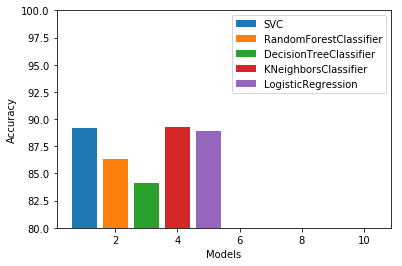

SVC Classifier: 89.1851851852
RandomForestClassifier: 86.2962962963
DecisionTreeClassifier: 84.1481481481
KNeighborsClassifier: 89.2592592593
LogisticRegression: 88.8888888889


In [2]:
#graph plot for accuracy
plt.bar(1, svc_accuracy*100, label='SVC')
plt.bar(2, rfc_accuracy*100, label='RandomForestClassifier')
plt.bar(3, dtc_accuracy*100, label='DecisionTreeClassifier')
plt.bar(4, knn_accuracy*100, label='KNeighborsClassifier')
plt.bar(5, lr_accuracy*100, label='LogisticRegression')
plt.bar(10, 0)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(80,100)
plt.show()
print("SVC Classifier: "+str(svc_accuracy*100))
print("RandomForestClassifier: "+str(rfc_accuracy*100))
print("DecisionTreeClassifier: "+str(dtc_accuracy*100))
print("KNeighborsClassifier: "+str(knn_accuracy*100))
print("LogisticRegression: "+str(lr_accuracy*100))

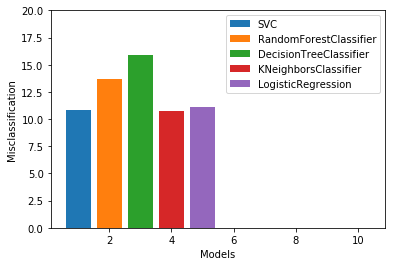

SVC Classifier: 10.8148148148
RandomForestClassifier: 13.7037037037
DecisionTreeClassifier: 15.8518518519
KNeighborsClassifier: 10.7407407407
LogisticRegression: 11.1111111111


In [3]:
#graph plot for misclassification
knn_mc = (knn_cm[0][1]+knn_cm[1][0])/(knn_cm[0][0]+knn_cm[0][1]+knn_cm[1][0]+knn_cm[1][1])
svc_mc = (svc_cm[0][1]+svc_cm[1][0])/(svc_cm[0][0]+svc_cm[0][1]+svc_cm[1][0]+svc_cm[1][1])
rfc_mc = (rfc_cm[0][1]+rfc_cm[1][0])/(rfc_cm[0][0]+rfc_cm[0][1]+rfc_cm[1][0]+rfc_cm[1][1])
dtc_mc = (dtc_cm[0][1]+dtc_cm[1][0])/(dtc_cm[0][0]+dtc_cm[0][1]+dtc_cm[1][0]+dtc_cm[1][1])
lr_mc =  (lr_cm[0][1]+lr_cm[1][0])/(lr_cm[0][0]+lr_cm[0][1]+lr_cm[1][0]+lr_cm[1][1])

plt.bar(1, svc_mc*100, label='SVC')
plt.bar(2, rfc_mc*100, label='RandomForestClassifier')
plt.bar(3, dtc_mc*100, label='DecisionTreeClassifier')
plt.bar(4, knn_mc*100, label='KNeighborsClassifier')
plt.bar(5, lr_mc*100, label='LogisticRegression')
plt.bar(10, 0)
plt.xlabel('Models')
plt.ylabel('Misclassification')
plt.legend()
plt.ylim(0,20)
plt.show()
print("SVC Classifier: "+str(svc_mc*100))
print("RandomForestClassifier: "+str(rfc_mc*100))
print("DecisionTreeClassifier: "+str(dtc_mc*100))
print("KNeighborsClassifier: "+str(knn_mc*100))
print("LogisticRegression: "+str(lr_mc*100))

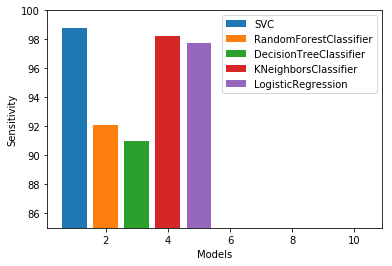

SVC Classifier: 98.7489574646
RandomForestClassifier: 92.0767306088
DecisionTreeClassifier: 90.9924937448
KNeighborsClassifier: 98.2485404504
LogisticRegression: 97.7481234362


In [4]:
#graph plot for Sensitivity
knn_ss = (knn_cm[1][1])/(knn_cm[1][0]+knn_cm[1][1])
svc_ss = (svc_cm[1][1])/(svc_cm[1][0]+svc_cm[1][1])
rfc_ss = (rfc_cm[1][1])/(rfc_cm[1][0]+rfc_cm[1][1])
dtc_ss = (dtc_cm[1][1])/(dtc_cm[1][0]+dtc_cm[1][1])
lr_ss =  (lr_cm[1][1])/(lr_cm[1][0]+lr_cm[1][1])

plt.bar(1, svc_ss*100, label='SVC')
plt.bar(2, rfc_ss*100, label='RandomForestClassifier')
plt.bar(3, dtc_ss*100, label='DecisionTreeClassifier')
plt.bar(4, knn_ss*100, label='KNeighborsClassifier')
plt.bar(5, lr_ss*100, label='LogisticRegression')
plt.bar(10, 0)
plt.xlabel('Models')
plt.ylabel('Sensitivity')
plt.legend()
plt.ylim(85,100)
plt.show()

print("SVC Classifier: "+str(svc_ss*100))
print("RandomForestClassifier: "+str(rfc_ss*100))
print("DecisionTreeClassifier: "+str(dtc_ss*100))
print("KNeighborsClassifier: "+str(knn_ss*100))
print("LogisticRegression: "+str(lr_ss*100))

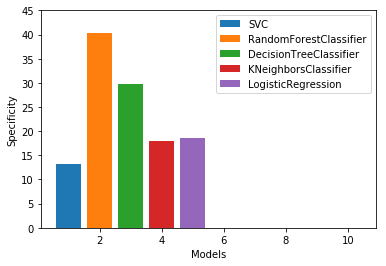

SVC Classifier: 13.2450331126
RandomForestClassifier: 40.3973509934
DecisionTreeClassifier: 29.8013245033
KNeighborsClassifier: 17.880794702
LogisticRegression: 18.5430463576


In [5]:
#graph plot for specificity
knn_sp = (knn_cm[0][0])/(knn_cm[0][0]+knn_cm[0][1])
svc_sp = (svc_cm[0][0])/(svc_cm[0][0]+svc_cm[0][1])
rfc_sp = (rfc_cm[0][0])/(rfc_cm[0][0]+rfc_cm[0][1])
dtc_sp = (dtc_cm[0][0])/(dtc_cm[0][0]+dtc_cm[0][1])
lr_sp =  (lr_cm[0][0])/(lr_cm[0][0]+lr_cm[0][1])

plt.bar(1, svc_sp*100, label='SVC')
plt.bar(2, rfc_sp*100, label='RandomForestClassifier')
plt.bar(3, dtc_sp*100, label='DecisionTreeClassifier')
plt.bar(4, knn_sp*100, label='KNeighborsClassifier')
plt.bar(5, lr_sp*100, label='LogisticRegression')
plt.bar(10, 0)
plt.xlabel('Models')
plt.ylabel('Specificity')
plt.legend()
plt.ylim(0,45)
plt.show()

print("SVC Classifier: "+str(svc_sp*100))
print("RandomForestClassifier: "+str(rfc_sp*100))
print("DecisionTreeClassifier: "+str(dtc_sp*100))
print("KNeighborsClassifier: "+str(knn_sp*100))
print("LogisticRegression: "+str(lr_sp*100))

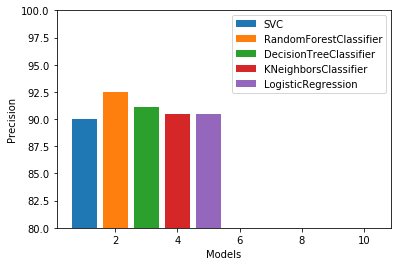

SVC Classifier: 90.0380228137
RandomForestClassifier: 92.4623115578
DecisionTreeClassifier: 91.1445279866
KNeighborsClassifier: 90.4761904762
LogisticRegression: 90.5019305019


In [6]:
#graph plot for precision
knn_pc = (knn_cm[1][1])/(knn_cm[0][1]+knn_cm[1][1])
svc_pc = (svc_cm[1][1])/(svc_cm[0][1]+svc_cm[1][1])
rfc_pc = (rfc_cm[1][1])/(rfc_cm[0][1]+rfc_cm[1][1])
dtc_pc = (dtc_cm[1][1])/(dtc_cm[0][1]+dtc_cm[1][1])
lr_pc =  (lr_cm[1][1])/(lr_cm[0][1]+lr_cm[1][1])

plt.bar(1, svc_pc*100, label='SVC')
plt.bar(2, rfc_pc*100, label='RandomForestClassifier')
plt.bar(3, dtc_pc*100, label='DecisionTreeClassifier')
plt.bar(4, knn_pc*100, label='KNeighborsClassifier')
plt.bar(5, lr_pc*100, label='LogisticRegression')
plt.bar(10, 0)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.legend()
plt.ylim(80,100)
plt.show()

print("SVC Classifier: "+str(svc_pc*100))
print("RandomForestClassifier: "+str(rfc_pc*100))
print("DecisionTreeClassifier: "+str(dtc_pc*100))
print("KNeighborsClassifier: "+str(knn_pc*100))
print("LogisticRegression: "+str(lr_pc*100))

In [ ]:
'''
link-
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (100+50)/165 = 0.91

Misclassification Rate: Overall, how often is it wrong?
(FP+FN)/total = (10+5)/165 = 0.09
equivalent to 1 minus Accuracy
also known as "Error Rate"

True Positive Rate: When it's actually yes, how often does it predict yes?
TP/actual yes = 100/105 = 0.95
also known as "Sensitivity" or "Recall"

False Positive Rate: When it's actually no, how often does it predict yes?
FP/actual no = 10/60 = 0.17

True Negative Rate: When it's actually no, how often does it predict no?
TN/actual no = 50/60 = 0.83
equivalent to 1 minus False Positive Rate
also known as "Specificity"


Precision: When it predicts yes, how often is it correct?
TP/predicted yes = 100/110 = 0.91
Prevalence: How often does the yes condition actually occur in our sample?
actual yes/total = 105/165 = 0.64
'''